<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Разделение-исходных-данных" data-toc-modified-id="Разделение-исходных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение исходных данных</a></span></li><li><span><a href="#Исследование-качества-модели" data-toc-modified-id="Исследование-качества-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование качества модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-качества-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-качества-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка качества модели на тестовой выборке</a></span></li></ul></div>

# Проект

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

### Цель проекта

 Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

### План проекта

1. Изучить данные
2. Разделить исходные данные на обучающую, валидационную и тестовую выборки.
3. Исследовать качество разных моделей, меняя гиперпараметры. Кратко написать выводы исследования.
4. Проверить качество модели на тестовой выборке.
5. Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

### Описание данных

сalls — количество звонков

minutes — суммарная длительность звонков в минутах

messages — количество sms-сообщений

mb_used — израсходованный интернет-трафик в Мб

is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Изучение данных

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


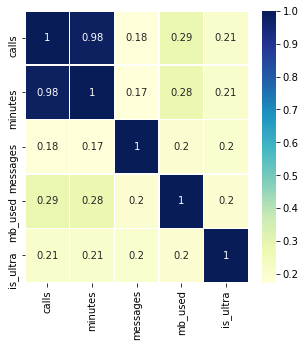

In [3]:
corr = df.corr()
plt.figure(figsize = (5,5))
sb.heatmap(corr,annot = True,linewidths=.5,cmap="YlGnBu")

Решил сделать матрицу корреляции, чтобы понять есть сильная связь между факторами. Как оказалась сильную связь имеет calls и minutes. Поэтому можно дропнуть один из факторов. Поэтому дропну минуты.

In [4]:
df = df.drop(['minutes'], axis=1)

Изучили данные

## Разделение исходных данных

Разделим все данные на 3 

In [5]:
df_train, df_valid = train_test_split(df, test_size=0.40, random_state=12345) 
df_valid, df_test = train_test_split(df_valid, test_size=0.50, random_state=12345) 

In [6]:
df_train.shape

(1928, 4)

In [7]:
df_valid.shape

(643, 4)

In [8]:
df_test.shape

(643, 4)

In [9]:
df_train

,calls,messages,mb_used,is_ultra
3027,60.0,26.0,14751.26,0
434,33.0,59.0,17398.02,0
1226,52.0,68.0,15462.38,0
1054,42.0,21.0,13243.48,0
1842,30.0,0.0,8189.53,0
...,...,...,...,...
2817,12.0,22.0,36628.85,1
546,65.0,0.0,15214.25,1
382,144.0,0.0,25002.44,1
2177,38.0,37.0,28914.24,1


## Исследование качества модели

In [10]:
features= df.drop(['is_ultra'], axis = 1)
target = df.is_ultra

In [11]:
features_train = df_train.drop(['is_ultra'], axis = 1)
target_train = df_train.is_ultra
features_valid = df_valid.drop(['is_ultra'], axis = 1)
target_valid = df_valid.is_ultra
features_test = df_test.drop(['is_ultra'], axis = 1)
target_test = df_test.is_ultra

### Дерево решений

In [12]:
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7838258164852255
max_depth = 3 : 0.7869362363919129
max_depth = 4 : 0.7853810264385692
max_depth = 5 : 0.7900466562986003


Лучшая модель при значении гиперпараметра - 5

### Случайный лес

In [13]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model
        best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.7698289269051322


### Логистическая регрессия

In [14]:
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression(random_state= 12345)
model.fit(features_train,target_train)
result = model.score(features_valid,target_valid)
print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7076205287713841


### Вывод


Лучшая модель получилась дерево решений

## Проверка качества модели на тестовой выборке

Проверим качество модели дерево решений на тестовой выборке

In [15]:
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_test = model.predict(features_test)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_test, predictions_test)) 

max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7698289269051322
max_depth = 3 : 0.7744945567651633
max_depth = 4 : 0.7729393468118196
max_depth = 5 : 0.7838258164852255


Оценка правильности тестовой выборки получилась меньше чем у обучающей выборки